In [2]:
#%%javascript
#IPython.load_extensions('calico-spell-check');

<IPython.core.display.Javascript object>

#Analyzing the NYC Subway Dataset -- Short Q & A 
###Zach Farmer    
****


##Table of Contents    
####[Section 1 -- Statistical Test](#Section 1 -- Statistical Test)        
   * [Question 1.1](#Question 1.1)     
   * [Question 1.2](#Question 1.2)      
   * [Question 1.3](#Question 1.3)   
   * [Question 1.4](#Question 1.4)
   
####[Section 2 -- Linear Regression](#Section 2 -- Linear Regression)   
   * [Question 2.1](#Question 2.1)    
   * [Queston 2.2 & 2.3](#Question 2.2)  
   * [Question 2.4](#Question 2.4) 
   * [Question 2.5](#Questions 2.5) 
   * [Questions 2.6](#Questions 2.6)   
   
####[Section 3 -- Visualization](#Section 3 -- Visualization) 
   * [3.1 -- Plot 1](#3.1 -- Plot 1)   
   * [3.2 -- Plot 2](#3.2 -- Plot 2)    
   
####[Section 4 -- Conclusion](#Section 4 -- Conclusion)   
   * [Question 4.1](#Question 4.1)      
   * [Question 4.2](#Question 4.2)    

####[Section 5 -- Reflection](#Section 5 -- Reflection)

####[References](#References)    

<a id="Section 1 -- Statistical Test"></a>
****

##Section 1: Statistical Test

<a id="Question 1.1"></a>

####1.1 Which statistical test did you use to analyze the NYC Subway data? Did you use a one-tail or a two-tail P-value? What was the null hypothesis? What is your p-critical value?

####Answer:   
  
####Which statistical test did you use to analyze the NYC Subway data?:    
* I used the Mann-Whitney U test to analyze the NYC Subway data, specifically to determine if there existed statistically significant differences in ridership between rainy and non-rainy days.     

####Did you use a one-tail or a two-tail P-value?:   
* I used a two-tail P-Value: The Mann-Whitney Test returns a one-tail p-value, In order to evaluate a two-tailed value I multiplied the one-tail value by 2 and used the resulting statistic as my p-value.  

####What was the null hypothesis?:    
*  The null hypothesis is that the distributions of both groups are identical, such that there is no __statistical__ difference between the underlying distributions. We are attempting to determine if the independent variable has an affect on the dependent variable, In our case this translates to the null hypothesis that entries hourly with rain is distributed statistically the same as entries hourly without rain.

####What is your p-critical value?:    
* I choose a significance value ($\alpha$) of .05 so my p-critical value is p <= .05. 

<a id="Question 1.2"></a>

####1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.   

####Answer:   
The Mann-Whitney U test is applicable where a Welche's T-test for example is not because the Mann-Whitney test does not assume any specific type of underlying distribution to the data. The Welches' T-test and many similar tests assume a Gaussian distribution, the subway data of entries per hour is not a Gaussian/normal distribution. The function of a Mann-Whitney U-test is to determine if a difference exists between to independent groups where the dependent variable is not normally distributed. In our case we wish to know if there exists a difference in ridership (entries hourly) between rainy and non-rainy days.

<a id="Question 1.3"></a>

####1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test. 

####Answer:   
 
* With rain mean = 1105.44637675
* Without rain mean = 1090.27878015
* U-statistic = 1924409167.0
* one-tail p-value = 0.0249999127935
* two-tail p-value = 0.049999825587

<a id="Question 1.4"></a>

####1.4 What is the significance and interpretation of these results?

####Answer:   

As found earlier in our analysis the data does not appear to be normally distributed (Gaussian), thus the use of a Mann-Whitney U-Test which does not assume any particular distribution to the data. If we perform the test using the means of our two data groups; entries hourly with rain and entries hourly without rain, we will return a one-tail p-value of .024999. As a reminder, the Mann-Whitney U-Test is a statistical comparison of the means of the two samples provided and the null hypothesis is that the distributions of both groups are identical. In our case the null hypothesis is that entries hourly with rain is distributed statistically the same as entries hourly without rain.

We are interested in determining whether the presence of rain has any affect on entries hourly (ridership) so we will need to multiple the p-value returned by the Mann-Whitney test to achieve the two-tailed p-value test statistic which will indicate if any difference in distributions is likely present. If our significance level (α value) is .05 which would result in the null hypothesis being rejected only 5% of the time when it is in fact true, the critical value for our p-statistic would be p <= .05 respectively. Given our two-tailed p-value of .049999 and critical value of .05 we can state a statistically significant difference, in short there is a difference in ridership between rainy and non-rainy days. The two-tailed p-value is just under the critical value and I would suggest that we look at each distributions median and Inter-Quartile-Ranges in order to acquire a better grasp on the differences between these two groups.

<a id="Section 2 -- Linear Regression"></a>
***

## Section 2: Linear Regression

<a id="Question 2.1"></a>

####2.1 What approach did you use to compute the coefficient theta and produce the prediction for ENTRIESn_hourly in your regression model?   

####Answer:  

I tried out three different approaches each of which were from the family of generalized linear models. Before I implemented these different models I used sklearn's cross-validation module to split the weather-turnstile data into training and test data sets. I choose to perform Ordinary Least Squares regression which given the features I provided returned a coefficient of determination of .4742 for the training data, using the training data to test my model was done to replicate the process used for the analysis of the gradient descent model performed before implementing my own versions. The prediction value for the test data was .4609, slightly less then the training data. Then hypothesising that there might be some collinearity in my feature choices I implemented a Ridge regression with sklearn's Cross-Validation to discover the best $\alpha$ for the Ridge parameter. After discovering a .01 $\alpha$ as providing the best outcome I fitted the training and test data and arrived at different coefficients but similar $R^2$ outcomes for both the training and test predictions. Finally I implemented a Lasso model out of interest in determining how important all of the over 400 features were. The same coefficient of determination resulted and almost all of the feature coefficients were non-zero or of some relevancy (I had originally included thunder as a feature but the lasso model indicated that it had no beneficial effect for my model so I removed it in all my models). The $R^2$ of greatest importance in my opinion is the test data results as these reflect the predictive power of the models on data it has yet to seen.

<a id="Question 2.2"></a>

####2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features? & 2.3 Why did you select these features in your model?: 

####Answer:   

* __features__:         
    + Hour
    + maxpressurei
    + maxdewpti
    + mindewpti
    + minpressurei
    + meandewpti
    + meanpressurei
    + fog
    + rain
    + meanwindspdi
    + mintempi
    + meantempi
    + maxtempi
    + precipi
* __dummy variables__:
    + unit_R001,...,unit_R552
    + Mon-Sun    

I began with selecting the same features that were used in the gradient descent as I wanted to show that a different model could perform at least as well. I then added in the dew point features min, max and mean as I believed that they might affect individuals perceptions of wetness and play a part in their decision to use public transit. Along those same lines I choose to add in the pressure measurements as they are often correlated with weather changes and subsequent rain, fog or sun. Although these variables' added predictive value was minimal they did slightly increase my $R^2$ so I continued to include them in my models. Dummy variables were inserted for all of the units or stations, believing that different stations will have different sizes, ridership numbers, and types of commuter crowds. For instance some stations located more centrally in the city may services those commuters who possess no other method of transportation, these individuals will not be influenced by weather, as a result those stations ridership numbers are likely to be fairly constant. Finally I included dummy variables for the days of the week, some EDA (exploratory data analysis) showed that there exists significant differences in ridership numbers between weekdays and weekends and I wished my models to attempt to capture this.   

<a id="Question 2.4"></a>

####2.4 What are the coefficients (or weights) of the non-dummy features in your linear regression model?:  

####Answer:    

  features   |       OLS       |     Ridge      | Lasso   
-------------|-----------------|----------------|---------------   
maxtempi     |  -482.477420711 | -391.91265126  | -312.379844607   
mindewpti    |  -27.258708005  | -21.0218932493 | -10.9714495665    
mintempi     | -445.264429877  | -367.999558743 | -294.095652282    
precipi      |  -27.3566422136 | -27.5914320474 | -28.1350262604  
Hour         |  463.039605743  | 463.010900047  | 463.058269056   
minpressurei |  181.502139943  | 179.424656574  | 181.688854054  
meantempi    | 759.893357624   | 602.588036787  | 460.368397499    
meanpressurei| -274.342152448  | -269.069940518 | -274.243917544    
maxpressurei | 96.6769487111   | 91.9957322117  | 94.5342533145     
meandewpti   | -65.6707608471  | -67.6026868657 | -81.8186731865     
maxdewpti    | 171.150244187   | 164.823559506  | 165.093867455   
rain         | -86.9443182534  | -86.9995264598 | -87.0673771369   
fog          | 49.6920616517   | 51.5821892669  | 54.043295498   
meanwindspdi | -6.32591466804  | -7.18027121358 | -8.11980563306          


<a id="Question 2.5"></a>

####2.5 ***What is your model's $R^2$ (coefficient of determination) value?***  

####Answer:    
* Training data $R^2$ = .4742    
* Test data $R^2$ = .4609

<a id="Question 2.6"></a>

####2.6 What does this $R^2$ value mean for the goodness of fit for your regression model? Do you think this linear model to predict the ridership is appropriate for this dataset. Given the $R^2$ value? 

####Answer:    
$R^2$ is the measure of variability in our data explained or caught by our model. For example, an $R^2$ value of 0 would suggest that a model's line of best fit, in my case a linear line, explained 0 percent of the variance in the data strongly indicating no linear relationship between the dependent variable, entries hourly and the independent factors, i.e. all the other variables I included in my model (such a model would not be able to make any accurate prediction about future ridership numbers). Conversely had I received an $R^2$ value of 1.0, this would suggest that the dependent and independent variables were perfectly linearly correlated and my linear regression had caught or modeled that correlation exactly (suggesting that the model should be able to predict with perfect accuracy future ridership numbers). What does this mean for my model? If I use the test data $R^2$ value of .4609 which is more reflective of a real world use case, as the training data $R^2$ value had the benefit of already knowing the actual entries hourly, the coefficient of determination would indicate weak linear correlation between the data. As explained above my linear model would have caught or explained roughly 46% of the variance in the data, indicating the data likely has some relationship or correlation with each other but that relationship is not perfectly linear. Graphing the residuals with a probability plot would likely look similar to the linear regression with gradient descent probability graph in problem set 3. I would consider trying alternative models such as; polynomial regression, support vector regression or decision tree regression to see if I couldn't find a model that captures more of the variance in our data, this would be reflected by a higher $R^2$ value, closer to 1, which would lead to better predictions of ridership numbers. 

<a id="Section 3 -- Visualization"></a>
***

## Section 3: Visualization

<a id="3.1 -- Plot 1"></a>     

####3.1 -- Plot 1


In [14]:
##Import Modules for following visualizations
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
from pylab import *
import datetime
from ggplot import *

%matplotlib inline
rcParams['figure.figsize'] = 10, 6

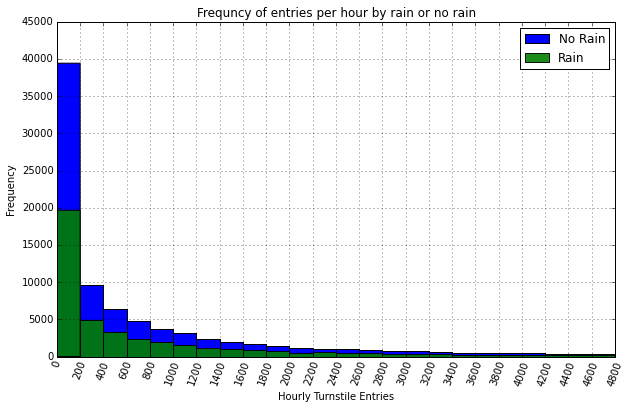

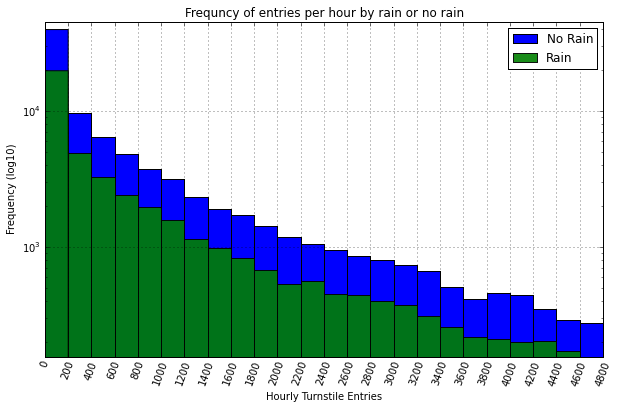

In [15]:
#!/anaconda/python
#Author: Zach Farmer
#Purpose: Exploratory visual data anlysis

def entries_histogram(turnstile_weather):
    '''
    Plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. 
    
    Parameters:
        turnstile_weather = turnstile data with weather statistics attached in
        csv file format.
        
    Output:
        Two plots containing histograms showing hourly entries when rainging vs. not
        raining. Second plot the same except y-axis is log transformed
    '''
    
    ## Convert csv to pandas dataframe for easier analysis and plotting
    turnstile_weather = pd.read_csv(turnstile_weather)
    
    def plotHist(turnstile_weather, logY=False):
        #plt.figure()
        #plot a historgram for hourly entries when it is not raining
        turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 0].\
        hist(bins=range(0, 5000, 200), label = 'No Rain') 
    
        ## plot a historgram for hourly entries when it is raining
        turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 1].\
        hist(bins= range(0,5000,200), alpha =.9, label = 'Rain') 
    
        ## adjust the breaks of x axis ticks
        plt.xticks(np.arange(min(turnstile_weather['ENTRIESn_hourly']),\
                             max(turnstile_weather['ENTRIESn_hourly']),\
                             200))
        ## rotate tick labels for easier reading
        plt.xticks(rotation=70) 
    
        ## remove outlier data from the figure by narrowing boundaries
        plt.xlim(0,4800)
        ## Adjust for log transforming y
        if logY:
            plt.yscale('log', nonposy='clip')
            plt.ylabel('Frequency (log10)')
        else:
            plt.ylabel('Frequency')
        plt.ylim(0,45000)
        
        plt.legend(loc='upper right')
        plt.title('Frequncy of entries per hour by rain or no rain')
        plt.xlabel('Hourly Turnstile Entries')
        
        plt.show()
    
    plotHist(turnstile_weather)
    plotHist(turnstile_weather, logY=True)

    return None
    
if __name__=="__main__":
    entries_histogram("turnstile_data_master_with_weather.csv")

####Analysis:   
>The plots (second one log transformed y-scale) suggests a difference between rain and non-rain days. The difference is hard to determine from the graphs but it does look like there might be a difference in distribution but visually it's a slight one.

<a id="3.2 -- Plot 2"></a>     

####3.2 -- Plot 2

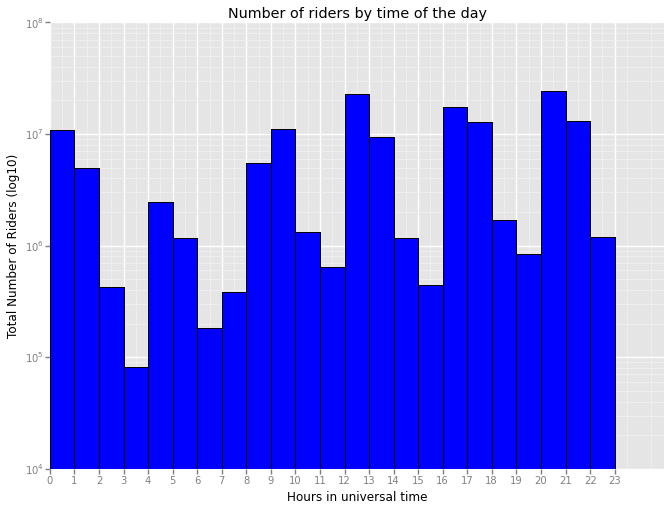

<ggplot: (282474381)>


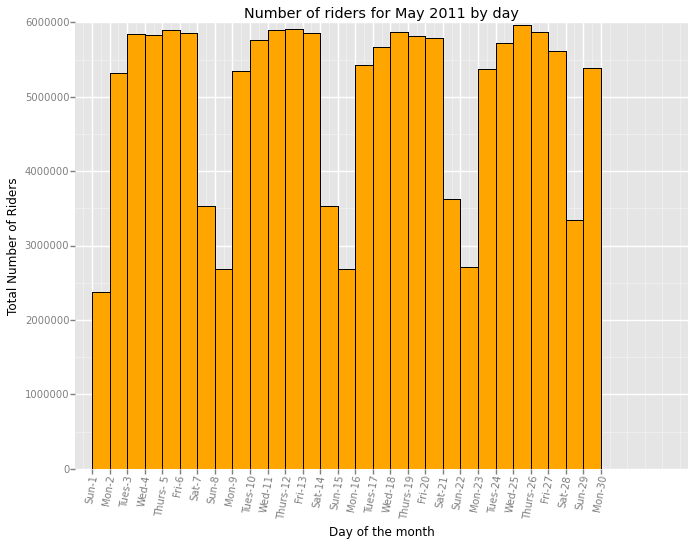

<ggplot: (281458093)>


In [17]:
#!/anaconda/python
#Author: Zach Farmer
#Purpose: Exploratory visual data anlysis

def plot_hist_weather_data(turnstile_weather):
    '''
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data 
    
    Parameters: 
        turnstile_weather = turnstile data with weather statistics attached in
        csv file format.
    
    Output:
        Several plots displaying relationships between variables in the 
        the provided data.
    '''
    
    # Use group_by to aggregate to hours
    group_by_Time = turnstile_weather.groupby(['Hour']).sum().ENTRIESn_hourly
    RiderShip_by_Time = pd.DataFrame({'Hours' : group_by_Time.index,\
                                      'Total_Riders':group_by_Time.values})
    
    # Use group_by to aggregate to the date
    group_by_Day = turnstile_weather.groupby('DATEn').sum().ENTRIESn_hourly
    RiderShip_by_Day = pd.DataFrame({'Date' : pd.to_datetime(group_by_Day.index).day,\
                                     'Total_Riders' : group_by_Day.values})
    
    ## Use ggplot
    plot1 = ggplot(RiderShip_by_Time,aes(x='Hours', weight = 'Total_Riders')) + \
        geom_bar(binwidth = 1,color = 'black', fill = 'blue') + \
        xlab('Hours in universal time') + \
        ylab('Total Number of Riders (log10)') + \
        scale_y_log10() + \
        scale_x_continuous(breaks = range(0,24)) + \
        ggtitle('Number of riders by time of the day')
    
    
    plot2 = ggplot(RiderShip_by_Day,aes(x='Date')) + \
        geom_bar(aes(weight='Total_Riders'),binwidth = 1,\
                     color = 'black', fill = 'orange') + \
        xlab('Day of the month') + \
        ylab('Total Number of Riders') + \
        scale_x_discrete(breaks = range(1,31,1),\
                         labels = ['Sun-1','Mon-2','Tues-3',\
                                   'Wed-4','Thurs- 5', 'Fri-6',\
                                   'Sat-7','Sun-8','Mon-9','Tues-10',\
                                   'Wed-11','Thurs-12','Fri-13',\
                                   'Sat-14','Sun-15','Mon-16',\
                                   'Tues-17','Wed-18','Thurs-19',\
                                   'Fri-20','Sat-21','Sun-22','Mon-23',\
                                   'Tues-24','Wed-25','Thurs-26',\
                                   'Fri-27','Sat-28','Sun-29','Mon-30']) + \
        ggtitle('Number of riders for May 2011 by day') + \
        theme(axis_text_x = element_text(angle=80))
    
    print(plot1)
    print(plot2)
   
    return None 

if __name__=="__main__":
    warnings.simplefilter('ignore')
    turnstile_weather = pd.read_csv(turnstile_weather)
    turnstile_weather = turnstile_weather.iloc[:,1:len(turnstile_weather.columns)]
    
    plot_hist_weather_data("turnstile_data_master_with_weather.csv")

####Analysis:   
>Graphs show the riderships trends throughout a day with higher ridership around daytime hours, there does appear to be large ridership at midnight supporting the stereotype of the city that never sleeps. clearly highlighted is the ridership differences between weekdays and weekends, likely a result of daily work commuters. This cyclic pattern would be important for a model to fit.

####3.2 Continued

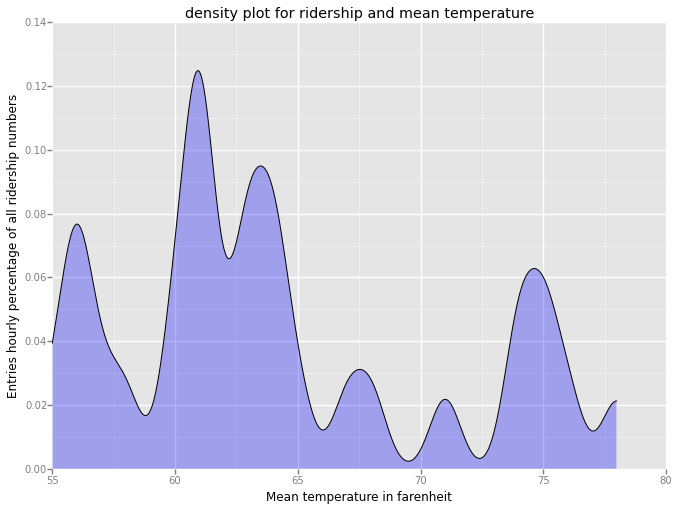

<ggplot: (270139945)>


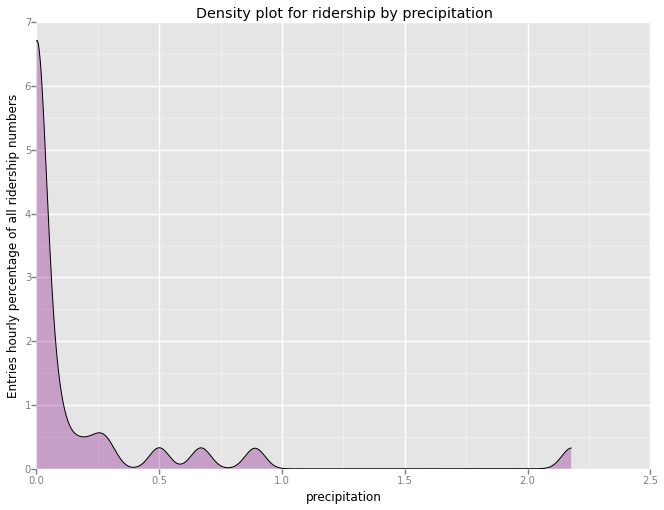

<ggplot: (281055969)>


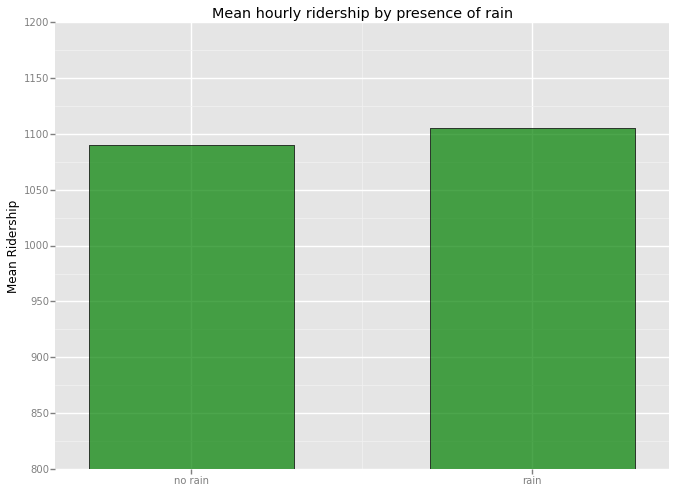

<ggplot: (278861445)>


In [18]:
#!/anaconda/python
#Author: Zach Farmer
#Purpose: Exploratory visual data anlysis

def plot_density_weather_data(turnstile_weather):
    '''
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data 
    
    Parameters: 
        turnstile_weather = turnstile data with weather statistics attached in
        csv file format.
    
    Output:
        Several plots displaying relationships between variables in the 
        the provided data.
    '''
    plot1 = ggplot(turnstile_weather[['meantempi','ENTRIESn_hourly']], aes(x='meantempi')) +\
                geom_density(fill = "blue" , alpha = .3) + \
                ggtitle("density plot for ridership and mean temperature") + \
                xlab("Mean temperature in farenheit") + \
                ylab("Entries hourly percentage of all ridership numbers")
    
    plot2 = ggplot(turnstile_weather[['precipi','ENTRIESn_hourly']], aes(x='precipi')) + \
                geom_density(fill = 'purple', alpha = .3) + \
                ggtitle("Density plot for ridership by precipitation") + \
                xlab("precipitation") + \
                ylab("Entries hourly percentage of all ridership numbers")
    
    plot3 = ggplot(turnstile_weather, aes(x = 'rain', y='ENTRIESn_hourly', width=.6 )) + \
                geom_bar(stat = "summary",color ='black', fill = 'green', alpha = .7) + \
                scale_x_continuous(breaks = [0,1], labels = ('no rain','rain')) + \
                scale_y_continuous(limits = [800,1200], breaks = range(800,1200,50)) + \
                ggtitle("Mean hourly ridership by presence of rain") + \
                xlab("") + \
                ylab("Mean Ridership")
    
    print(plot1)
    print(plot2)
    print(plot3)           

    return  None

if __name__=="__main__":
    turnstile_weather = pd.read_csv("turnstile_data_master_with_weather.csv")
    turnstile_weather = turnstile_weather.iloc[:,1:len(turnstile_weather.columns)]
    
    plot_density_weather_data(turnstile_weather)


####Analysis:   
> The density plot (1st graph) showing temperature and ridership is likely just a weather graph, with more data, for example the same time period but during previous years we might be able to see if temperature had a large effect on ridership. It appears that there might be a correlation between really nice weather and increased ridership numbers. The density plot (2nd chart) by precipitation does seem to show a trend of most ridership occurring during low precipitation, but this could be a result of there simply not being much precipitation during the data's time frame. Finally the last graph seems to suggest a slight but noticeable difference in the mean ridership between raining and non-raining days, trending towards lower mean ridership values for days without rain. 

####3.2 Continued 

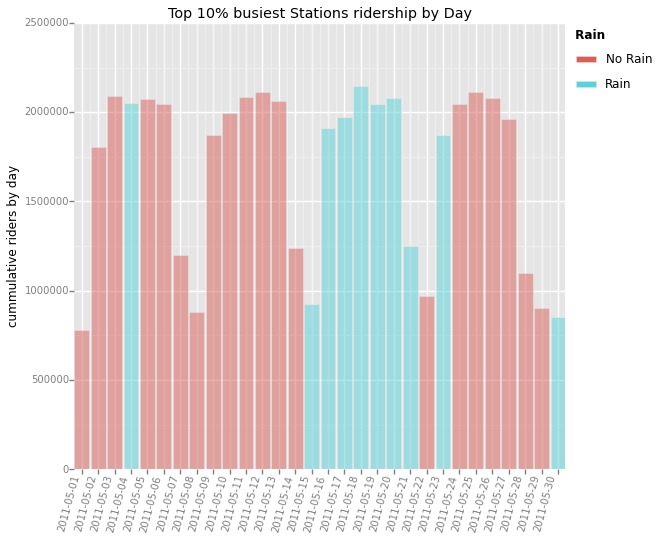

<ggplot: (289212581)>


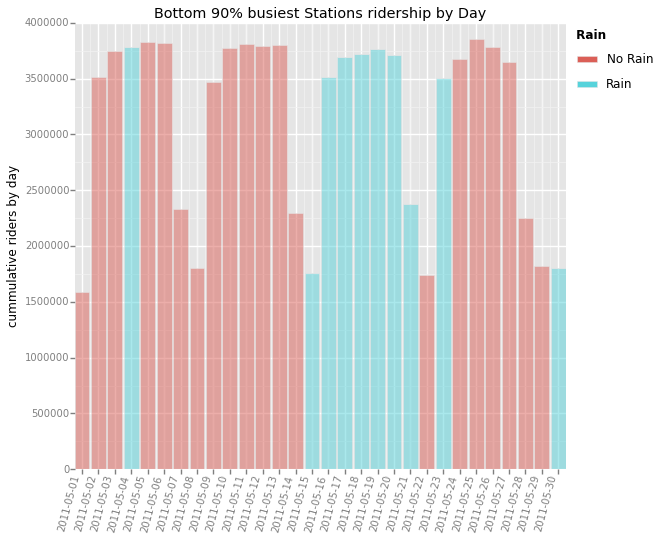

<ggplot: (279385781)>


In [14]:
#!/anaconda/python
#Author: Zach Farmer
#Purpose: Exploratory visual data anlysis

def label_hack(x):
    '''
    Necessary as a reuslt of the limited functionality of python ggplot port compared to the
    r-version. No scale_x_discrete to adjust the 0,1 labels for rain on the legend. Therefore
    I decided to simply change the numerical representation to a qaulitative one for these graphs.
    '''
    if x == 0:
        return 'no rain'
    else:
        return 'rain'

def high_low_stations(turnstile_weather):
    ''' 
    Input weather turnstile data frame, divide data set into the top 
    10% busiest stations and the other 90%. Return graph charting the differences
    in ridership numbers when raining between these two groups.
    '''
    df = turnstile_weather
    df_high =  df.groupby(['UNIT']).sum().sort("ENTRIESn_hourly",ascending=False)
    # separate out the top 10% busiest stations
    df_top10 = df_high[0:int(.1*len(df_high))]
    df_bottom90 = df_high[int(.1*len(df_high)):]
    #print list(df_top10.index.values)
    #print list(df_bottom90.index.values)
    # create boolean slicer for the two groups
    df_top_mask = df['UNIT'].isin(list(df_top10.index.values))
    df_bottom_mask = df['UNIT'].isin(list(df_bottom90.index.values))
    
    # Separated dataframes representing the top 10% and the bottom 90%
    df_top = df[df_top_mask]
    df_bottom = df[df_bottom_mask]
    
    # apply label hack to label presence of rain
    df_top['rain']=df_top['rain'].map(lambda x: label_hack(x))
    
    plot1 = ggplot(df_top,aes(x='DATEn', y = 'ENTRIESn_hourly', fill = 'rain')) + \
                geom_histogram(aes(weight = 'ENTRIESn_hourly'), alpha = .5) + \
                theme(axis_text_x=element_text(angle = 75, hjust = 1 )) + \
                ggtitle("Top 10% busiest stations ridership by day") + \
                xlab("") + \
                ylab("cummulative riders by day")
    print(plot1)
    # apply label hack to label presence of rain
    df_bottom['rain']=df_bottom['rain'].map(lambda x: label_hack(x))
    
    plot2 = ggplot(df_bottom,aes(x='DATEn', y = 'ENTRIESn_hourly', fill = 'rain')) + \
                geom_histogram(aes(weight = 'ENTRIESn_hourly'), alpha = .5) + \
                theme(axis_text_x=element_text(angle = 75, hjust = 1 )) + \
                ggtitle("Bottom 90% busiest stations ridership by day") + \
                xlab("") + \
                ylab("cummulative riders by day")
    print(plot2)            
    return None

if __name__=="__main__":
    turnstile_weather = pd.read_csv("turnstile_data_master_with_weather.csv")
    turnstile_weather = turnstile_weather.iloc[:,1:len(turnstile_weather.columns)]
    warnings.simplefilter('ignore')
    high_low_stations(turnstile_weather)

####Analysis:   
>These two graphs were created to discover if a difference existed in ridership during rainy days vs.  non-rainy days based on the traffic through the stations. To further clarify, I split the data into two different sets, one representing the top 10% busiest stations and the other consisting of the remaining 90%. I then charted the total ridership by day and further distinguished the data by whether or not it was raining. It appears that for the busiest stations there is a slight difference between rainy days and non-rainy days (with greater ridership on rainy days). For the bottom 90% of stations it does appear as if there might be a minor reduction of ridership during rainy days. 

<a id="Section 4 -- Conclusion"></a>
***

##Section 4: Conclusion

<a id="Question 4.1"></a>   

####4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?

####Answer:   
Looking at the provided data and performing an analysis on it, I would suggest more people ride the subway when it is raining then when it is not raining. However the data is time-series based and the period provided really isn't long enough to make a strong analysis. 


<a id="Question 4.2"></a>   

####4.2 -- What analyses lead you to this conclusion? 

####Answer:  

My first indication that ridership might be affected by the presence of rain occurred after I performed the Mann-Whitney U Test which suggested a statistical difference was present with a two-tailed p-value of .0499. Next my linear models predictive power ($r^2$) was improved by adding rain and precipitation as features suggesting that they play a part in a commuters decisions to take the subway. Looking at graphs showing the difference (3.2) between hourly entries during rainy and non-rainy days further contributed to my assessment that rain has an affect on ridership numbers. The mean number of riders per hour represents the average between all possible ridership numbers per hour for all stations and all hours. Keeping in mind that we are comparing the mean of ten days of data to that of twenty days of data, I find that on days that lack rain ridership at the smaller end of entries hourly (smaller slower stations) appears to be greater then that of ridership at larger end of entries hourly (larger busier stations)(3.2 last graph). However the opposite seems to be that case for the larger entries hourly (the busiest stations)(this is likely the reason for the mean results), it looks like the mean is being elevated enough to be significant by the busiest(most centrally located?) stations being frequented more on rainy days. If we believe that on non-rainy days more people who might be able to take alternative transportation (such as walking) are more likely to do so it could be that those centrally located busy stations may not receive as much traffic as that of rainy days. 

It is my hypothesis that entries hourly at small and large stations might be affected differently by the presence of rain, on this hunch I separated the data by total station ridership comparing the top 10% to the bottom 90% and found a slight visual difference suggesting my hypothesis appears to have some merit, further statistical analysis would need to be conducted to confirm this. As suggested early it could be the case that a certain number of riders have no other means of transportation but those who do may choose alternative forms of transportation on non-rainy days. 

<a id="Section 5 -- Reflection"></a>
***

##Section 5: Reflection

####Please discuss potential shortcomings of the methods of your analysis, including: 
1. ***Dataset,***
2. ***Analysis, such as the linear regression model or statistical test***

####Answer:   

The dataset is a time-series data set which in itself is not a problem however the time period is only one month in one year, which is not a long enough period of time to perform an adequate analysis. We really should have more data over a longer period on time, ideally the month we examined for several years back. In our provided time period it rained a total 10 of the 30 days we analyzed which is thirty percent of the data but given that we only have a total of 30 days for just 1 month I would feel more comfortable having more data in order to make a more solid assessment of the affect rain has on ridership generally. 

The analysis while showing a statistical significance in ridership numbers between rainy and non-rainy days did not do a very good job of predicting future ridership numbers when using linear models. I believe that a model which more accurately reflected the inherently cyclical patterns in ridership over hours, days of the week, and months of the year would do a much better job at predicting ridership numbers. The presence of a weekend vs. a weekday is far more influential to ridership numbers than that of rain. While the statistical model does show statistical difference I would like to test rain's relationship specifically to entries hourly, Spearmans' rank-order with precipitation and entries hourly or something similar to determine how great an influence rain is actually playing on ridership numbers. 

<a id="References"></a>
***

## List of References   

* pandas sql method:[https://dev.mysql.com/doc/refman/5.1/en/counting-rows.html](https://dev.mysql.com/doc/refman/5.1/en/counting-rows.html)  
* SQL's count function: [https://dev.mysql.com/doc/refman/5.1/en/counting-rows.html](https://dev.mysql.com/doc/refman/5.1/en/counting-rows.html)  
* csv reader/writer module: [http://docs.python.org/2/library/csv.html#examples](http://docs.python.org/2/library/csv.html#examples)  
* csv reader/writer introductory tutorial: [http://goo.gl/HBbvyy](http://goo.gl/HBbvyy)
* pythons' datetime module: [http://docs.python.org/2/library/datetime.html#datetime.datetime.strptime](http://docs.python.org/2/library/datetime.html#datetime.datetime.strptime)  
* Myriad of minor python questions: [www.stackoverflow.com](http://stackoverflow.com/)  
* matplotlib and pandas to plot histograms: [http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms](http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms)  
* GraphPad statistical guide: [http://www.graphpad.com/guides/prism/6/statistics/index.htm?stat_the_unequal_variance_welch_t_t.htm](http://www.graphpad.com/guides/prism/6/statistics/index.htm?stat_the_unequal_variance_welch_t_t.htm) 
* Plotting: [http://matplotlib.org/users/pyplot_tutorial.html](http://matplotlib.org/users/pyplot_tutorial.html)  
* Mann-Whitney U test: Udacity Intro to Data Science Lesson 3, [http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html), [http://www.statisticssolutions.com/mann-whitney-u-test-2/](http://www.statisticssolutions.com/mann-whitney-u-test-2/),  [http://www.graphpad.com/guides/prism/6/statistics/index.htm?how_the_mann-whitney_test_works.htm](http://www.graphpad.com/guides/prism/6/statistics/index.htm?how_the_mann-whitney_test_works.htm), [http://www.isixsigma.com/tools-templates/hypothesis-testing/making-sense-mann-whitney-test-median-comparison/](http://www.isixsigma.com/tools-templates/hypothesis-testing/making-sense-mann-whitney-test-median-comparison/)
* Difference between one-tail/two-tailed test: [http://www.graphpad.com/guides/prism/6/statistics/one-tail_vs__two-tail_p_values.htm](http://www.graphpad.com/guides/prism/6/statistics/one-tail_vs__two-tail_p_values.htm) 
* Numpy mean: [http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)  
* Interquartile range with numpy: [stackoverflow](http://stackoverflow.com/questions/23228244/how-do-you-find-the-iqr-in-numpy) 
* Understanding residuals: [http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm](http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm)  
* Numpy sum: [http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)  
* Numpy square: [http://docs.scipy.org/doc/numpy/reference/generated/numpy.square.html](http://docs.scipy.org/doc/numpy/reference/generated/numpy.square.html)  
* sklearn's generalized linear models: [http://scikit-learn.org/stable/modules/linear_model.html](http://scikit-learn.org/stable/modules/linear_model.html)   
* ggplot: [https://pypi.python.org/pypi/ggplot/](https://pypi.python.org/pypi/ggplot/) 
* Coefficient of determination: [http://www.statsoft.com/Textbook/Multiple-Regression#cresidual](http://www.statsoft.com/Textbook/Multiple-Regression#cresidual)   



In [16]:
# Apply css style to notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()